__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?




Podemos evaluar funciones en matrices a traves de sus series de Taylor ya que elproducto de matrices está bien definido. 

__Ejercicio 2:__ ¿Como se define una matriz simétrica?



Una matriz simetrica es una matriz $A$ tal que $$ A=\frac{1}{2}(A+A^T)$$

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?



Sea B una matriz cuadrada, entonces tomemos $$ C=\frac{1}{2}(B+B^T)$$



notemos ahora que $C_{ij}=\frac{1}{2}(B_{ij}+B_{ji})=\frac{1}{2}(B_{ji}+B_{ij})=C_{ij}^T=C_{ji}$

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

__Método con exp __

In [64]:
using Plots
A=[-1 1 ; -1 -1]
vals=eigvals(A)
w=eigvecs(A)
B=inv(w)
d=diagm(vals)
w*diagm(exp.(vals))*w'
t=linspace(0.01,10,10000)

function propagador2(A,x,t)
    xt=[]
    for i in 1:length(t)
        v=w*diagm(exp.(t[i]*vals))*B*x
        push!(xt,v)
    end
    real(xt)
end

s=propagador(A,[2,1],t)
x=map(x->real(x[1]),s)
y=map(x->real(x[2]),s)      

10000-element Array{Float64,1}:
 0.9702    
 0.967244  
 0.964293  
 0.961345  
 0.958402  
 0.955462  
 0.952526  
 0.949595  
 0.946667  
 0.943743  
 0.940824  
 0.937908  
 0.934996  
 ⋮         
 1.03065e-5
 1.03981e-5
 1.04895e-5
 1.05808e-5
 1.06718e-5
 1.07626e-5
 1.08532e-5
 1.09436e-5
 1.10338e-5
 1.11238e-5
 1.12136e-5
 1.13033e-5


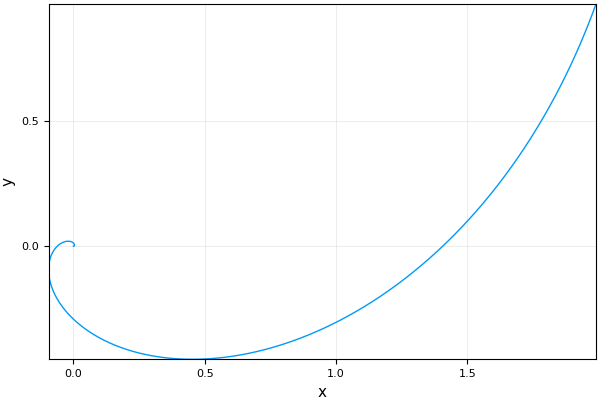

In [65]:
plot(x,y,xlabel="x",ylabel="y",label="")

__Método con expm__

In [66]:
function propagador(A,x,t)
    xt=[]
    for i in 1:length(t)
        v=expm(A*t[i])*x
        push!(xt,v)
    end
    xt
end
        

propagador (generic function with 1 method)

In [67]:
s=propagador(A,[2,1],t)
x=map(x->x[1],s);
y=map(x->x[2],s);


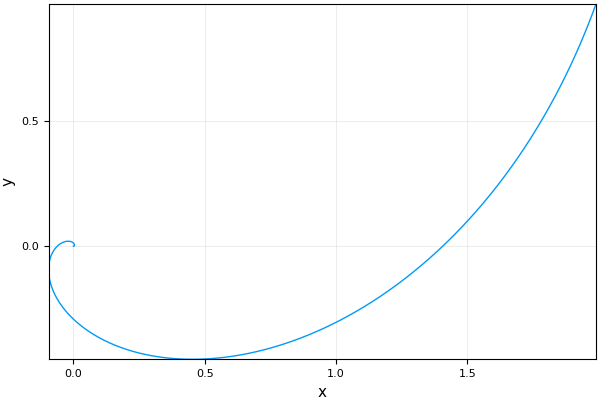

In [68]:
plot(x,y,xlabel="x",ylabel="y",label="")